In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [123]:
data=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [124]:
data.shape

(10000, 14)

In [125]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [126]:
x=data.iloc[:,0:13]

In [127]:
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [128]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [129]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [130]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [131]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [132]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [133]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [134]:
data = pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [137]:
X = data.drop(columns=['Exited'])
y = data['Exited']

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [139]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,1,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,1,1
6087,561,27,9,135637.00,1,1,0,153080.40,0,0,0
6669,517,56,9,142147.32,1,0,0,39488.04,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,0,0,0
5390,735,38,1,0.00,3,0,0,92220.12,0,0,0
860,667,43,8,190227.46,1,1,0,97508.04,0,0,1


In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
scaler = StandardScaler()

In [142]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [143]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [144]:
X_test_scaled

array([[-5.12501721e-01, -6.77299309e-01, -6.98445493e-01, ...,
         1.73668197e+00, -5.63491843e-01,  9.09111664e-01],
       [-2.36046598e-01,  3.84298354e-01, -1.38035469e+00, ...,
        -5.75810666e-01, -5.63491843e-01,  9.09111664e-01],
       [-4.61306328e-01,  4.80807232e-01, -3.57490896e-01, ...,
        -5.75810666e-01,  1.77464858e+00, -1.09997489e+00],
       ...,
       [ 8.59534812e-01,  7.70333868e-01,  6.65372897e-01, ...,
        -5.75810666e-01, -5.63491843e-01, -1.09997489e+00],
       [ 4.70449825e-01, -9.66825944e-01, -3.57490896e-01, ...,
        -5.75810666e-01, -5.63491843e-01,  9.09111664e-01],
       [-1.84851205e-01, -1.73715981e-03, -1.38035469e+00, ...,
         1.73668197e+00, -5.63491843e-01,  9.09111664e-01]])

In [145]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [146]:
model = Sequential()

In [147]:
# # input layer
# model.add(Dense(3,activation='sigmoid',input_dim=11))

# # output layer
# model.add(Dense(1,activation='sigmoid'))

In [160]:
# input layer
model.add(Dense(11,activation='relu',input_dim=11))

# hidden layer 
model.add(Dense(11,activation='relu')) 

# output layer
model.add(Dense(1,activation='sigmoid'))

In [161]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_15 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 12        
_________________________________________________________________
dense_17 (Dense)             (None, 11)                22        
_________________________________________________________________
dense_18 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 12        
Total params: 442
Trainable params: 442
Non-trainable params: 0
________________________________________________________

In [162]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [163]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.5876 - accuracy: 0.8105 - val_loss: 0.4634 - val_accuracy: 0.8456
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3841 - accuracy: 0.8633 - val_loss: 0.3646 - val_accuracy: 0.8562
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3411 - accuracy: 0.8661 - val_loss: 0.3618 - val_accuracy: 0.8425
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3349 - accuracy: 0.8642 - val_loss: 0.3548 - val_accuracy: 0.8431
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3322 - accuracy: 0.8683 - val_loss: 0.3520 - val_accuracy: 0.8512
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3310 - accuracy: 0.8686 - val_loss: 0.3545 - val_accuracy: 0.8544
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3291 - accuracy: 0.8669 - val_loss: 0.3509 - val_accuracy: 0.8506

In [164]:
model.layers[0].get_weights()

[array([[-0.27229586,  0.0110259 , -0.0908116 ,  0.06234435,  0.06031195,
          0.19043751, -0.07580089,  0.06091142,  0.30258474,  0.13945016,
         -0.0058306 ],
        [ 0.01760451,  0.0625356 ,  1.5453732 ,  0.2087385 ,  0.6817256 ,
          0.03979435,  0.12335717, -0.5343297 , -0.46186244,  0.1388492 ,
         -0.8304282 ],
        [-0.13384503, -0.06876557, -0.0048006 , -0.10664762,  0.01116241,
          0.2945891 , -0.04365482, -0.1425095 , -0.4828777 ,  0.1789218 ,
         -0.32008415],
        [ 0.2733895 ,  0.3860372 ,  0.09307593,  0.52231944, -0.39693254,
         -0.32674655, -0.3736434 , -0.22643179, -0.04362216, -0.22551046,
          0.05598944],
        [-0.18877524,  1.311987  , -0.22197518, -0.82299924,  0.7783551 ,
         -1.0615029 , -0.8686636 ,  0.23516311, -0.05788023, -0.04798933,
         -0.01282995],
        [-0.01919833,  0.02859015,  0.15084216,  0.28191525, -0.3652283 ,
          0.01037898,  0.15020637,  0.00577958,  0.23739602,  0.1214011

In [165]:
model.layers[1].get_weights()

[array([[ 0.0358434 ,  0.38218504,  0.18465249, -0.7365632 ,  0.4199778 ,
          0.23403375, -0.31976232,  0.18837495,  0.7594175 ,  0.3543268 ,
          0.4216088 ],
        [ 0.27815494, -0.3250669 , -0.4716041 , -0.44468987, -0.5419671 ,
         -0.72594815,  0.15395305,  0.23301838, -0.87377274,  0.8946902 ,
         -0.40959334],
        [-0.16594006,  0.37583447,  0.5685125 ,  0.27233887, -0.5741257 ,
          0.08756444, -0.2481543 ,  0.77545595,  0.31832018,  0.4231872 ,
         -0.4896355 ],
        [ 0.22168045, -0.1167351 ,  0.09380365,  0.6591878 , -0.06795663,
          0.19761004,  0.71171516,  0.57660663,  0.91229177, -0.24582751,
         -0.43585187],
        [-1.1319487 ,  0.01221632, -0.33408415,  0.58483505,  0.00575024,
         -0.86225504,  0.00922416, -0.42437387, -0.44031522,  0.59653497,
          0.33771032],
        [ 0.55773216, -0.26377127, -0.41598418, -0.7387056 , -0.09826523,
          0.40260637, -0.8028759 , -0.32628885, -0.18790323,  0.1586453

In [166]:
model.layers[2].get_weights()

[array([[-0.61417365],
        [-0.38717508],
        [ 0.23102775],
        [-0.9640752 ],
        [-0.8163078 ],
        [ 0.5350346 ],
        [-0.5277925 ],
        [-0.75552267],
        [ 0.5900884 ],
        [ 0.7390054 ],
        [-0.89823407]], dtype=float32),
 array([0.00688863], dtype=float32)]

In [167]:
ylog = model.predict(X_test_scaled)

In [168]:
y_pred = np.where(ylog>0.5,1,0)

In [169]:
from sklearn.metrics import accuracy_score

In [170]:
print("accuracy score",accuracy_score(y_test,y_pred)*100,"%")

accuracy score 85.95 %


In [171]:
import matplotlib.pyplot as plt 
import matplotlib as mb

In [173]:
history.history

{'loss': [0.5876480937004089,
  0.38413605093955994,
  0.34105929732322693,
  0.33488720655441284,
  0.3322359025478363,
  0.3310437500476837,
  0.32908380031585693,
  0.3294222354888916,
  0.3281242847442627,
  0.3273693025112152,
  0.3273058235645294,
  0.326847106218338,
  0.32624486088752747,
  0.32676586508750916,
  0.3252728283405304,
  0.3255119323730469,
  0.3252909481525421,
  0.32668864727020264,
  0.3245243430137634,
  0.32532283663749695,
  0.32466524839401245,
  0.3237592279911041,
  0.32430535554885864,
  0.32296812534332275,
  0.3230840265750885,
  0.32472652196884155,
  0.3227120339870453,
  0.32371824979782104,
  0.3236045837402344,
  0.3243027627468109,
  0.32260650396347046,
  0.3230968117713928,
  0.3226807415485382,
  0.32224801182746887,
  0.32310202717781067,
  0.32204586267471313,
  0.3223770558834076,
  0.32223689556121826,
  0.3211716115474701,
  0.3230142295360565,
  0.3217807710170746,
  0.32244908809661865,
  0.32155272364616394,
  0.32212507724761963,
  0.

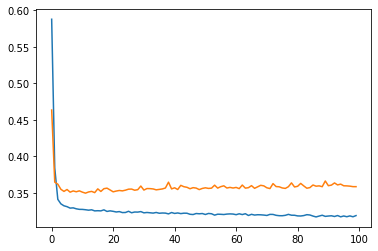

In [179]:
# plt.figure(fig=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

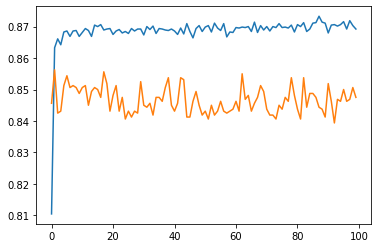

In [180]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])